## NPS 분석 해보기

캐글의 Shopify가 제공하는 App에 대한 데이터를 활용하여 사용자들의 NPS를 분석해보는 것이 목적이다.

해당 데이터의 링크 : https://www.kaggle.com/usernam3/shopify-app-store

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
# 분석에 필요한 CSV파일들 불러오기
apps = pd.read_csv("./shopify/apps.csv")
apps_categories = pd.read_csv("./shopify/apps_categories.csv")
categories = pd.read_csv("./shopify/categories.csv")
reviews = pd.read_csv("./shopify/reviews.csv")

### 불러온 파일들의 구조 파악 및 병합

In [3]:
apps.head()

,id,url,title,developer,developer_link,icon,rating,reviews_count,description_raw,description,tagline,pricing_hint
0,9e4748a9-7eda-4814-83b6-0537d44152b1,https://apps.shopify.com/translate,Panda Language Translate,Panda Apps,https://apps.shopify.com/partners/ittechzilla,https://apps.shopifycdn.com/listing_images/269...,4.7,379,"<div class=""block app-listing__detailed-descri...",Panda Language Translation improve your busine...,Translate your store into multiple languages,7-day free trial
1,d1476138-a608-4bb9-8d39-b30f3ca7617d,https://apps.shopify.com/instant-brand-page,Instant Brand Page,Low Fruit Solutions PTY LTD,https://apps.shopify.com/partners/lowfruitsolu...,https://apps.shopifycdn.com/listing_images/51d...,4.9,13,"<div class=""block app-listing__detailed-descri...",Having a brand page gives your shoppers a quic...,A-Z Brand Index Page and Favourites Slider,10-day free trial
2,d6e49a3c-2f9f-4bfa-8c26-5d024faf2241,https://apps.shopify.com/powr-faq,FAQ Accordion | Help Center,POWR.io,https://apps.shopify.com/partners/powr-io,https://apps.shopifycdn.com/listing_images/86c...,4.5,202,"<div class=""block app-listing__detailed-descri...","Create, organize and display Frequently Asked ...","FAQ page, FAQ accordion menu for product Info ...",NaN
3,0ef0087f-3ae5-4dbc-84e0-193b576d82ed,https://apps.shopify.com/mps-promote-me,Promote Me | Many apps in one,MakeProSimp,https://apps.shopify.com/partners/makeprosimp,https://apps.shopifycdn.com/listing_images/5dc...,4.9,18,"<div class=""block app-listing__detailed-descri...",Promote Me app is a bundle of apps that includ...,"Spin Wheel,Currency Converter,Quick ATC Button...",10-day free trial
4,7aac2a1f-ff03-4f38-aeb7-7619403a6f05,https://apps.shopify.com/installify-boost-mobi...,Instalify,Plobal Apps,https://apps.shopify.com/partners/plobal-apps,https://apps.shopifycdn.com/listing_images/737...,0.0,0,"<div class=""block app-listing__detailed-descri...",We are trusted by hundreds of Shopify and Shop...,Supercharge Your Mobile App Installs,7-day free trial


In [4]:
apps.shape

(4750, 12)

In [5]:
apps_categories.shape

(7376, 2)

In [6]:
apps_categories.head()

,app_id,category_id
0,9e4748a9-7eda-4814-83b6-0537d44152b1,c3f9db73c29bc33607778f9935c3c4dc
1,d1476138-a608-4bb9-8d39-b30f3ca7617d,c3f9db73c29bc33607778f9935c3c4dc
2,d6e49a3c-2f9f-4bfa-8c26-5d024faf2241,c3f9db73c29bc33607778f9935c3c4dc
3,d6e49a3c-2f9f-4bfa-8c26-5d024faf2241,64430ad2835be8ad60c59e7d44e4b0b1
4,0ef0087f-3ae5-4dbc-84e0-193b576d82ed,c3f9db73c29bc33607778f9935c3c4dc


In [7]:
categories.head()

,id,title
0,c3f9db73c29bc33607778f9935c3c4dc,Store design
1,64430ad2835be8ad60c59e7d44e4b0b1,Customer support
2,5eb4e29e50e3f178acc614236ed107f4,Sales and conversion optimization
3,c769c2bd15500dd906102d9be97fdceb,Marketing
4,30ea2315e910c5e5335de42d5e87dca5,Orders and shipping


In [8]:
apps_categories_title = apps_categories.merge(categories, left_on="category_id", right_on="id", how="outer")
apps_categories_title.shape

(7376, 4)

In [9]:
apps_categories_title.head()

,app_id,category_id,id,title
0,9e4748a9-7eda-4814-83b6-0537d44152b1,c3f9db73c29bc33607778f9935c3c4dc,c3f9db73c29bc33607778f9935c3c4dc,Store design
1,d1476138-a608-4bb9-8d39-b30f3ca7617d,c3f9db73c29bc33607778f9935c3c4dc,c3f9db73c29bc33607778f9935c3c4dc,Store design
2,d6e49a3c-2f9f-4bfa-8c26-5d024faf2241,c3f9db73c29bc33607778f9935c3c4dc,c3f9db73c29bc33607778f9935c3c4dc,Store design
3,0ef0087f-3ae5-4dbc-84e0-193b576d82ed,c3f9db73c29bc33607778f9935c3c4dc,c3f9db73c29bc33607778f9935c3c4dc,Store design
4,7aac2a1f-ff03-4f38-aeb7-7619403a6f05,c3f9db73c29bc33607778f9935c3c4dc,c3f9db73c29bc33607778f9935c3c4dc,Store design


### NPS를 계산하기 위한 Review 데이터를 전처리

In [10]:
reviews.head()

,app_id,author,rating,posted_at,body,helpful_count,developer_reply,developer_reply_posted_at
0,b1da53a4-0474-4700-9620-bf386bc033fb,Consuela,5,"August 6, 2020",Great and super fast customer service! Highly ...,0,NaN,NaN
1,b1da53a4-0474-4700-9620-bf386bc033fb,L'Atelier Global,5,"August 4, 2020","Still setting up my store, and after initially...",0,NaN,NaN
2,b1da53a4-0474-4700-9620-bf386bc033fb,city'super E-Shop,5,"August 4, 2020","This is an excellent search app, which they ha...",0,NaN,NaN
3,b1da53a4-0474-4700-9620-bf386bc033fb,PortableHandwashing.com,5,"July 30, 2020","A+, great great great customer service! thanks...",0,NaN,NaN
4,b1da53a4-0474-4700-9620-bf386bc033fb,ICCTUNING,5,"July 28, 2020","I'm begginig to use this app, the search engin...",0,NaN,NaN


In [11]:
reviews.shape

(447317, 8)

In [12]:
reviews["rating"].value_counts()

5    379442
4     36678
1     16896
3      9552
2      4749
Name: rating, dtype: int64

In [13]:
id_rating = reviews[["app_id", "rating"]]
grouped = id_rating.groupby("app_id")["rating"].count()

In [14]:
id_rating["app_id"].value_counts()

1a4accf8-b57e-4c08-a07c-fe5db0f0a0bc    24303
0c29ae5e-01e0-4efb-959f-40d9041db6fa     9618
da066a0b-53fc-42a2-b329-e0cce559f7ea     7180
af249a63-7d38-4197-87c1-f93e8f550d67     6706
8a918fac-e47a-41fe-bc7a-4dfcb8321401     6345
                                        ...  
92835038-d407-497e-a133-8f56114d2546        1
cf384462-913c-4110-b2ff-841e17c4641d        1
a74641a3-0a7a-46a5-9e59-aa87b43694d9        1
8e133312-1a67-4e80-989c-29f00620f8f4        1
e066c6d5-7890-4d07-b4cd-20bb3c6c24e1        1
Name: app_id, Length: 3733, dtype: int64

In [15]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447317 entries, 0 to 447316
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   app_id                     447317 non-null  object
 1   author                     447193 non-null  object
 2   rating                     447317 non-null  int64 
 3   posted_at                  447317 non-null  object
 4   body                       447116 non-null  object
 5   helpful_count              447317 non-null  int64 
 6   developer_reply            47561 non-null   object
 7   developer_reply_posted_at  47561 non-null   object
dtypes: int64(2), object(6)
memory usage: 27.3+ MB


In [16]:
id_rating = reviews[["app_id", "rating"]].melt(id_vars="app_id")
id_rating

,app_id,variable,value
0,b1da53a4-0474-4700-9620-bf386bc033fb,rating,5
1,b1da53a4-0474-4700-9620-bf386bc033fb,rating,5
2,b1da53a4-0474-4700-9620-bf386bc033fb,rating,5
3,b1da53a4-0474-4700-9620-bf386bc033fb,rating,5
4,b1da53a4-0474-4700-9620-bf386bc033fb,rating,5
...,...,...,...
447312,1a4accf8-b57e-4c08-a07c-fe5db0f0a0bc,rating,2
447313,1a4accf8-b57e-4c08-a07c-fe5db0f0a0bc,rating,5
447314,1a4accf8-b57e-4c08-a07c-fe5db0f0a0bc,rating,5
447315,1a4accf8-b57e-4c08-a07c-fe5db0f0a0bc,rating,5


In [17]:
id_to_rating = pd.pivot_table(id_rating,
               index="value",
               columns="app_id",
               values="value",
               aggfunc="count").T

id_to_rating.columns.name = None
id_to_rating = id_to_rating.fillna(0)
id_to_rating = id_to_rating.astype(int)
id_to_rating["total"] = id_to_rating.sum(axis=1)
id_to_rating

,1,2,3,4,5,total
app_id,,,,,,
00014403-ad17-4c9b-bbcf-5adc27ba18a9,0,0,0,2,30,32
000270a8-af0b-4862-82df-25decbcc8d86,0,0,0,0,2,2
0006d5af-c461-4bdb-b32e-a4fecd00846b,4,1,0,1,70,76
001ce7ab-14dc-45ce-98f1-1b42b61c86c1,0,0,0,0,1,1
00215fb3-ff7c-4111-8f0c-8e7e2a9027fb,1,0,0,0,4,5
...,...,...,...,...,...,...
ff9fcefb-cb60-4ff3-8ec8-75a6e89b9055,4,0,1,44,1639,1688
ffda2590-e98f-46b7-8608-ce242bfd0c07,1,0,0,0,5,6
ffda8a87-f35e-4d27-bee9-c3088a613e08,0,0,1,2,185,188


In [18]:
id_to_rating = id_to_rating.reset_index()

In [19]:
shopify_data = id_to_rating.merge(apps, how="outer", left_on="app_id", right_on="id")
shopify_data.shape

(4750, 19)

In [20]:
shopify_data.head()

,app_id,1,2,3,4,5,total,id,url,title,developer,developer_link,icon,rating,reviews_count,description_raw,description,tagline,pricing_hint
0,00014403-ad17-4c9b-bbcf-5adc27ba18a9,0.0,0.0,0.0,2.0,30.0,32.0,00014403-ad17-4c9b-bbcf-5adc27ba18a9,https://apps.shopify.com/inventory-alerts,StockBot Low Stock Alert,StoreBuilder,https://apps.shopify.com/partners/storebuilder,https://apps.shopifycdn.com/listing_images/f61...,5.0,32,"<div class=""block app-listing__detailed-descri...",Are you struggling to identify and restock pro...,Low inventory alerts & Sales Forecasting,14-day free trial
1,000270a8-af0b-4862-82df-25decbcc8d86,0.0,0.0,0.0,0.0,2.0,2.0,000270a8-af0b-4862-82df-25decbcc8d86,https://apps.shopify.com/uplogic,Uplogic AI Search,Uplogic,https://apps.shopify.com/partners/uplogic,https://apps.shopifycdn.com/listing_images/57f...,5.0,2,"<div class=""block app-listing__detailed-descri...",Increase conversion with the smart and relevan...,AI Search to Optimize Conversion,30-day free trial
2,0006d5af-c461-4bdb-b32e-a4fecd00846b,4.0,1.0,0.0,1.0,70.0,76.0,0006d5af-c461-4bdb-b32e-a4fecd00846b,https://apps.shopify.com/instant-page-load,Page Load Magic,Kaleido,https://apps.shopify.com/partners/kaleido,https://apps.shopifycdn.com/listing_images/f3e...,4.7,76,"<div class=""block app-listing__detailed-descri...",Perceived page loading is more important than ...,Make website load instantly and increase conve...,NaN
3,001ce7ab-14dc-45ce-98f1-1b42b61c86c1,0.0,0.0,0.0,0.0,1.0,1.0,001ce7ab-14dc-45ce-98f1-1b42b61c86c1,https://apps.shopify.com/ai-intent-popup-by-st...,Stream Pop Up & Boost Sales,Stream,https://apps.shopify.com/partners/wuzhouzhongpin,https://apps.shopifycdn.com/listing_images/a3b...,5.0,1,"<div class=""block app-listing__detailed-descri...",What can you get from Stream Pop Up & Boost Sa...,AI-Driven Exit Intent Pop up & Automatic Discount,NaN
4,00215fb3-ff7c-4111-8f0c-8e7e2a9027fb,1.0,0.0,0.0,0.0,4.0,5.0,00215fb3-ff7c-4111-8f0c-8e7e2a9027fb,https://apps.shopify.com/customer-segment-builder,Customer Segment Builder,Coherent Path Inc.,https://apps.shopify.com/partners/rareio,https://apps.shopifycdn.com/listing_images/316...,4.2,5,"<div class=""block app-listing__detailed-descri...",Try Customer Segment Builder - and get better ...,Simple & Effective Customer Segmentation. Find...,NaN


In [21]:
shopify_data.columns

Index([         'app_id',                 1,                 2,
                       3,                 4,                 5,
                 'total',              'id',             'url',
                 'title',       'developer',  'developer_link',
                  'icon',          'rating',   'reviews_count',
       'description_raw',     'description',         'tagline',
          'pricing_hint'],
      dtype='object')

In [22]:
shopify_data = shopify_data.drop(["id", "url", "developer_link", "icon", "description_raw"], axis=1)
shopify_data.shape

(4750, 14)

In [23]:
apps_categories_title = apps_categories_title.rename(columns={"title":"category"})

In [24]:
apps_categories_title.shape

(7376, 4)

In [25]:
shopify_data = shopify_data.merge(apps_categories_title[["app_id", "category"]], how="inner", left_on="app_id", right_on="app_id")
shopify_data = shopify_data.drop_duplicates(subset="app_id", keep="first")
shopify_data.shape

(3733, 15)

### 최종 NPS 분석을 위한 데이터프레임에서 NPS 계산

In [26]:
shopify_data

,app_id,1,2,3,4,5,total,title,developer,rating,reviews_count,description,tagline,pricing_hint,category
0,00014403-ad17-4c9b-bbcf-5adc27ba18a9,0.0,0.0,0.0,2.0,30.0,32.0,StockBot Low Stock Alert,StoreBuilder,5.0,32,Are you struggling to identify and restock pro...,Low inventory alerts & Sales Forecasting,14-day free trial,Inventory management
2,000270a8-af0b-4862-82df-25decbcc8d86,0.0,0.0,0.0,0.0,2.0,2.0,Uplogic AI Search,Uplogic,5.0,2,Increase conversion with the smart and relevan...,AI Search to Optimize Conversion,30-day free trial,Store design
3,0006d5af-c461-4bdb-b32e-a4fecd00846b,4.0,1.0,0.0,1.0,70.0,76.0,Page Load Magic,Kaleido,4.7,76,Perceived page loading is more important than ...,Make website load instantly and increase conve...,NaN,Store design
4,001ce7ab-14dc-45ce-98f1-1b42b61c86c1,0.0,0.0,0.0,0.0,1.0,1.0,Stream Pop Up & Boost Sales,Stream,5.0,1,What can you get from Stream Pop Up & Boost Sa...,AI-Driven Exit Intent Pop up & Automatic Discount,NaN,Store design
6,00215fb3-ff7c-4111-8f0c-8e7e2a9027fb,1.0,0.0,0.0,0.0,4.0,5.0,Customer Segment Builder,Coherent Path Inc.,4.2,5,Try Customer Segment Builder - and get better ...,Simple & Effective Customer Segmentation. Find...,NaN,Marketing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5771,ff9fcefb-cb60-4ff3-8ec8-75a6e89b9055,4.0,0.0,1.0,44.0,1639.0,1688.0,ReConvert Upsell & Cross Sell,StilyoApps eCommerce Design & Abandoned Cart R...,5.0,1688,Why should you optimize your thank you page? (...,Thank you landing page builder | post purchase...,30-day free trial,Customer support
5774,ffda2590-e98f-46b7-8608-ce242bfd0c07,1.0,0.0,0.0,0.0,5.0,6.0,SourceKnowledge Shopping Ads,SourceKnowledge,4.3,6,Connect your Shopify store to SourceKnowledge ...,Reach in-market shoppers to drive new sales,NaN,Marketing
5775,ffda8a87-f35e-4d27-bee9-c3088a613e08,0.0,0.0,1.0,2.0,185.0,188.0,Product Review App + Video,HelpfulCrowd,5.0,188,"28 app storefront languages – English, Español...","Product reviews app with Video reviews, Google...",14-day free trial,Store design
5777,fff053c9-30de-426b-8a5f-3e393ff45ec0,2.0,0.0,1.0,2.0,75.0,80.0,"Pop Up, Email & Exit Pop Ups",Poptin,4.9,80,"Exit intent Popup, Autoresponder & Inline Form...","Email Pop Up, Upsell Exit Intent Popup, Top Ba...",NaN,Store design


In [27]:
# APP당 NPS 점수 계산
shopify_data["NPS"] = (shopify_data[5] - shopify_data[1] - shopify_data[2]) / shopify_data["total"]
shopify_data["NPS"]

0       0.937500
2       1.000000
3       0.855263
4       1.000000
6       0.600000
          ...   
5771    0.968602
5774    0.666667
5775    0.984043
5777    0.912500
5780    1.000000
Name: NPS, Length: 3733, dtype: float64

In [28]:
nps = shopify_data.sort_values(by="NPS", ascending=False)[["title", "NPS", "category"]]

<AxesSubplot:ylabel='Count'>

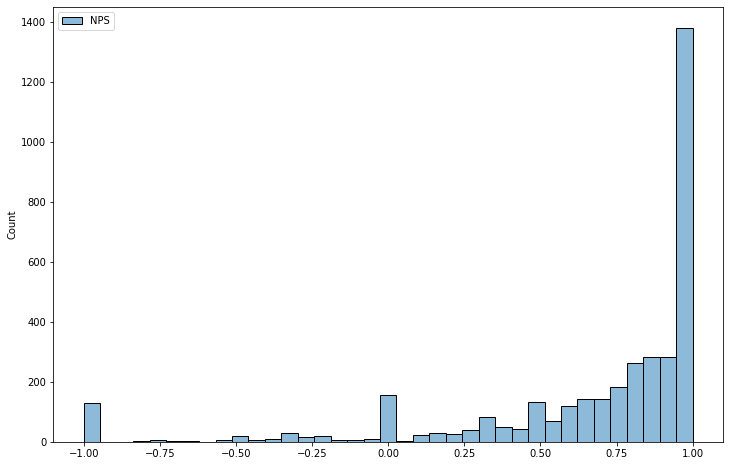

In [34]:
# 모든앱의 NPS 분포 파악
plt.figure(figsize=(12, 8))
sns.histplot(data = nps)

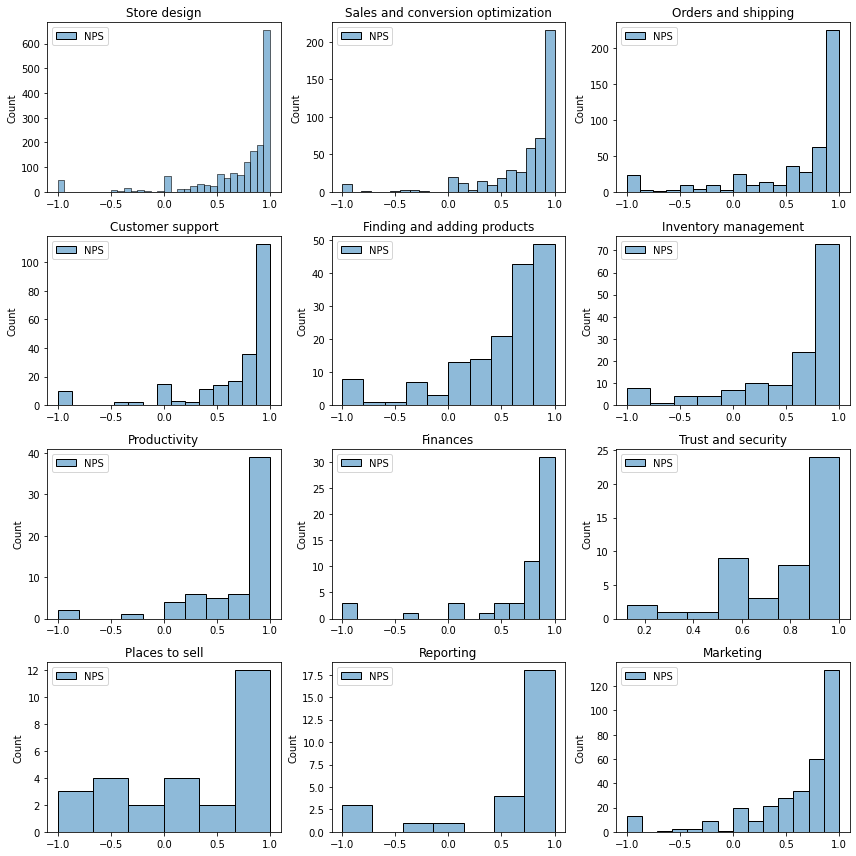

In [29]:
# 카테고리별 NPS 분포 시각화

fig, axes = plt.subplots(4, 3, sharex=False, figsize=(12, 12))

sns.histplot(ax=axes[0][0], data=nps[nps["category"] == "Store design"])
axes[0][0].set_title("Store design")

sns.histplot(ax=axes[0][1], data=nps[nps["category"] == "Sales and conversion optimization"])
axes[0][1].set_title("Sales and conversion optimization")

sns.histplot(ax=axes[0][2], data=nps[nps["category"] == "Orders and shipping"])
axes[0][2].set_title("Orders and shipping")

sns.histplot(ax=axes[1][0], data=nps[nps["category"] == "Customer support"])
axes[1][0].set_title("Customer support")

sns.histplot(ax=axes[1][1], data=nps[nps["category"] == "Finding and adding products"])
axes[1][1].set_title("Finding and adding products")

sns.histplot(ax=axes[1][2], data=nps[nps["category"] == "Inventory management"])
axes[1][2].set_title("Inventory management")

sns.histplot(ax=axes[2][0], data=nps[nps["category"] == "Productivity"])
axes[2][0].set_title("Productivity")

sns.histplot(ax=axes[2][1], data=nps[nps["category"] == "Finances"])
axes[2][1].set_title("Finances")

sns.histplot(ax=axes[2][2], data=nps[nps["category"] == "Trust and security"])
axes[2][2].set_title("Trust and security")

sns.histplot(ax=axes[3][0], data=nps[nps["category"] == "Places to sell"])
axes[3][0].set_title("Places to sell")

sns.histplot(ax=axes[3][1], data=nps[nps["category"] == "Reporting"])
axes[3][1].set_title("Reporting")

sns.histplot(ax=axes[3][2], data=nps[nps["category"] == "Marketing"])
axes[3][2].set_title("Marketing")

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='NPS', ylabel='category'>

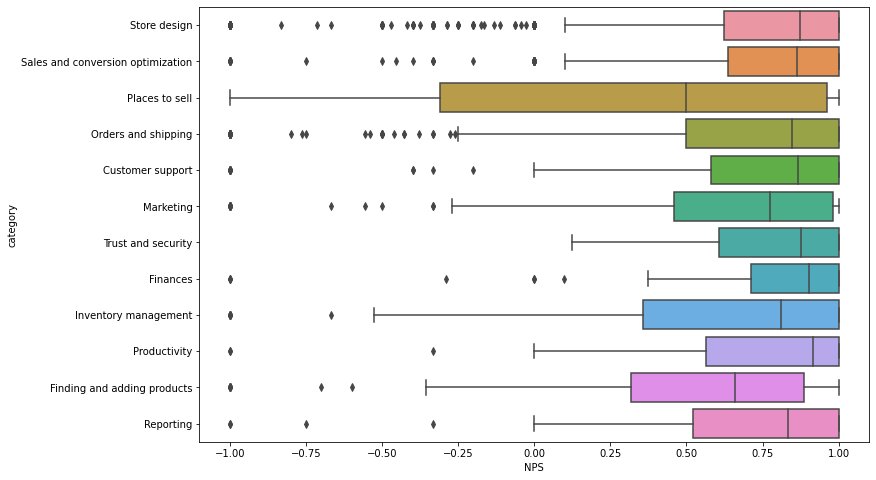

In [30]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=nps, x="NPS", y="category")

In [31]:
# NPS 상위 50위 앱 (리뷰 숫자를 고려함)

nps_high_50 = shopify_data.sort_values(by=["reviews_count", "NPS"], ascending=False).head(50)[["title", "NPS", "reviews_count", "category", "description" ]]
nps_high_50

,title,NPS,reviews_count,category,description
584,"Privy ‑ Pop Ups, Email, & SMS",0.729704,24303,Store design,Privy is trusted by small and large ecommerce ...
273,Free Shipping Bar,0.889166,9618,Store design,*****New Feature: You can translate the free s...
4930,BEST Currency Converter,0.826741,7180,Store design,Works with any Theme \n Works out of the box w...
3964,Sales Pop ‑ Social Proof Popup,0.797047,6706,Store design,"More sales, higher conversions and less hassle..."
3104,Ultimate Sales Boost,0.839559,6345,Store design,New: You can translate Ultimate Sales Boost ca...
3195,Free Traffic & Ads by Varinode,0.914403,5852,Marketing,"For a limited time, all new installs will rece..."
1568,Recart FB Messenger Marketing,0.866740,5463,Sales and conversion optimization,"The #1 Messenger App for Shopify, installed by..."
2301,Sales Pop Master ‑ Countdown,0.811575,5339,Store design,Sales Pop Master ‑ Sales Popup aims to solve t...
1437,Loox ‑ Photo Reviews,0.905763,5327,Store design,"Available in English, French (Avis), German (B..."
2904,Quick Announcement Bar,0.904951,4787,Store design,*****New Feature: You can translate the Quick ...


<AxesSubplot:xlabel='Count', ylabel='category'>

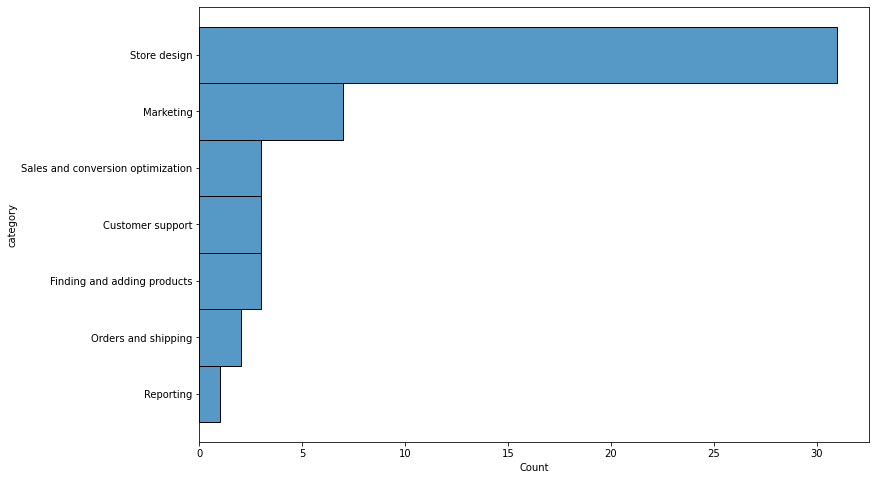

In [32]:
plt.figure(figsize=(12, 8))
sns.histplot(data=nps_high_50, y="category")

### NPS 분석을 직접 해보면서 느낀점

- 고객의 평가 데이터와 제품 및 서비스 데이터는 키값은 동일하지만 구조가 다르므로 전처리가 필요하다.
- 리뷰를 남긴 고객에 대한 표본만이 존재하므로, 전체 고객에 대한 정보가 없이 구한 NPS 스코어는 불완전하다.
- 카테고리별 NPS 구분을 하더라도, boxplot을 통해 개별 값들의 분포를 확인해야 한다.
- Store Design 카테고리의 경우, 평균적으로 높은 NPS를 가지지만 부정적 NPS를 가진 아웃라이어 또한 많다.
- 히스토그램은 모든 카테고리 앱들이 높은 NPS를 기준으로 멱분포를 보인다.
- 이것은 분석한 데이터가 리뷰를 남긴 고객들을 표본으로 했기 때문일 수 있다. (생존자 편향처럼)
- 제대로 된 NPS 분석을 위해서는 응답하지 않은 고객 표본 데이터가 필요하다.
- 1-5점으로 평가된 데이터의 경우 -> 0-10점 NPS 스케일에 어떤 척도로 변환하는 게 맞을 지 고민해봐야 한다.

### 추가적으로 생각해볼만한 가설
- 리뷰가 많은 APP이 NPS 또한 상대적으로 높을까? (NPS와 Review 수와의 상관관계)
- 생존자 편향이 섞인 표본 샘플에서 계산한 NPS에서 해석할 수 있는 정보는 무엇일까?
- -1에 가까운 NPS와 1에 가까운 NPS를 보이는 APP들은 부정적 / 긍정적 사용자 경험을 의미한다고 할 수 있을까?
- 모집단의 특성을 대표한다는 조건을 만족할만한 최소 Review 숫자는 몇개로 설정해야 할까? 1000개? 100개?